<img src="assets/logo.png">

# Principal Component Analysis (PCA)
Made by **Abhishek Wasnik** and **Balázs Nagy**

source: [Principal Component Analysis from Scratch in Python](https://www.askpython.com/python/examples/principal-component-analysis)

[<img src="assets/open_button.png">](https://colab.research.google.com/github/Fortuz/edu_MethodsAndTools/blob/main/practices/P12_PCA_solved.ipynb)

Principal component analysis or PCA in short is famously known as a dimensionality reduction technique.

It has been around since 1901 and still used as a predominant dimensionality reduction method in machine learning and statistics. PCA is an unsupervised statistical method.

In this notebook, we will have some intuition about PCA and will implement it by ourselves from scratch using Python and NumPy.

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

# Why use PCA in the first place?

To support the cause of using PCA let’s look at one example.

Suppose we have a dataset having two variables and 10 number of data points. If we were asked to visualize the data points, we can do it very easily. The result is very interpretable as well.

In [2]:
X1 = [2, 8, 1, 4, 22, 15, 25, 29, 4, 2]
X2 = [3, 6, 2, 6, 18, 16, 20, 23, 6, 4]

X_example = np.column_stack((X1, X2))

print('Shape of the example dataset: ', X_example.shape)

Shape of the example dataset:  (10, 2)


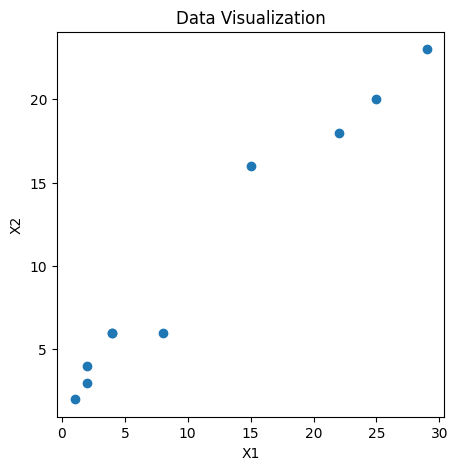

In [3]:
plt.figure(figsize = (5,5))
plt.plot(X_example[:,0], X_example[:,1], 'o')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Visualization')
plt.show()

Now if we try to increase the number of variables it gets almost impossible for us to imagine a dimension higher than three-dimensions.

This problem we face when analyzing higher-dimensional datasets is what commonly referred to as **“The curse of dimensionality”**. This term was first coined by Richard E. Bellman.

Principal Component analysis reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset. Data visualization is the most common application of PCA. PCA is also used to make the training of an algorithm faster by reducing the number of dimensions of the data.

# Implementation of PCA with python

To grasp the maximum intuition from the content given below, we assume you must know a little bit about linear algebra and [matrices](https://www.askpython.com/python/python-matrix-tutorial). If not then we highly encourage you to watch the [Linear algebra series of 3Blue1Brown](https://www.youtube.com/watch?v=fNk_zzaMoSs) on YouTube by Grant Sanderson, to get a refresher of the concepts as it will prove to be very beneficial in your Machine Learning journey ahead.

We can think of Principal Component analysis to be like fitting an n-dimensional ellipsoid to the data so that each axis of the ellipsoid represents a principal component. The larger the principal component axis the larger the variability in data it represents.

<img src="assets/P12_pca.png">

# Steps to implement PCA in Python

## 1. Normalization
Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.

In [4]:
def normalize(X):
    ##### EDIT #####
    mu  = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    std_filled = std.copy()
    std_filled[std==0] = 1.

    X_norm = ((X-mu)/std_filled)
    ################
    return X_norm, mu, std

In [5]:
# CHECK
X_norm_ex, _, _ = normalize(X_example)
print(X_norm_ex)

print('Shape of the matrix: ', X_norm_ex.shape)

[[-0.90844538 -0.98500451]
 [-0.315981   -0.58567835]
 [-1.00718944 -1.11811322]
 [-0.71095725 -0.58567835]
 [ 1.06643588  1.01162625]
 [ 0.37522744  0.74540882]
 [ 1.36266807  1.27784368]
 [ 1.75764432  1.67716983]
 [-0.71095725 -0.58567835]
 [-0.90844538 -0.85189579]]
Shape of the matrix:  (10, 2)


Data generated by the above code have dimensions (20,5) i.e. 20 examples and 5 variables for each example. we calculated the mean of each variable and subtracted that from every row of the respective column.

## 2. Calculate the Covariance Matrix

Calculate the Covariance Matrix of the mean-centered data. You can know more about the covariance matrix in this really informative Wikipedia article [here](https://en.wikipedia.org/wiki/Covariance_matrix).

The covariance matrix is a square matrix denoting the covariance of the elements with each other. The covariance of an element with itself is nothing but just its Variance.

That’s why the diagonal elements of a covariance matrix are just the variance of the elements.

In [6]:
# calculating the covariance matrix of the mean-centered data.
def calc_covMat(X_norm):
    ##### EDIT #####
    cov_mat = np.cov(X_norm , rowvar = False)
    ################
    return cov_mat

In [7]:
# CHECK
cov_mat_ex = calc_covMat(X_norm_ex)
print(cov_mat_ex)

[[1.11111111 1.09560005]
 [1.09560005 1.11111111]]


We can find easily calculate covariance Matrix using numpy.cov( ) method. The default value for rowvar is set to True, remember to set it to False to get the covariance matrix in the required dimensions.

### Question

- What does the covariance matrix shows?

## 3. Compute the Eigenvalues and Eigenvectors

Now, compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix. The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.

A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

Orthogonal means the vectors are mutually perpendicular to each other. Eigenvalues and vectors seem to be very scary until we get the idea and concepts behind it.

**HINT**:
NumPy `linalg.eigh( )` method returns the eigenvalues and eigenvectors of a complex Hermitian or a real symmetric matrix.

In [8]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
def calc_eigen(cov_mat):
    ##### EDIT #####
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    ################
    return eigen_values , eigen_vectors

In [9]:
# CHECK
eigen_values_ex , eigen_vectors_ex = calc_eigen(cov_mat_ex)

print(eigen_values_ex)
print(eigen_vectors_ex)

[0.01551107 2.20671116]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


## 4. Sort Eigenvalues in descending order

Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

Remember each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

**HINT**:
`np.argsort` returns an array of indices of the same shape.

In [10]:
#sort the eigenvalues in descending order
def sort_eigen(eigen_values , eigen_vectors):
    ##### EDIT #####
    sorted_index = np.argsort(eigen_values)[::-1]

    sorted_eigenvalue = eigen_values[sorted_index]
    #similarly sort the eigenvectors
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    ################
    return sorted_eigenvectors

In [11]:
# CHECK
sorted_eigenvectors_ex = sort_eigen(eigen_values_ex , eigen_vectors_ex)

print(sorted_eigenvectors_ex)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## 5. Select a subset from the rearranged Eigenvalue matrix

Select a subset from the rearranged Eigenvalue matrix as per our need i.e. `number_comp = 2`. This means we selected the first two principal components.

`n_components = 2` means our final data should be reduced to just 2 variables. if we change it to 3 then we get our data reduced to 3 variables.

In [12]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.

def select_eigensubset(sorted_eigenvectors, n_components = 2):
    ##### EDIT #####
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    ################
    return eigenvector_subset

In [13]:
# CHECK
eigenvector_subset_ex = select_eigensubset(sorted_eigenvectors_ex, n_components = 1)

print(eigenvector_subset_ex)

[[0.70710678]
 [0.70710678]]


## 6. Transform the data

Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the normalized data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In [14]:
#Transform the data
def reduce_dimension(X_norm, eigenvector_subset):
    ##### EDIT #####
    X_reduced = np.dot(eigenvector_subset.transpose(),X_norm.transpose()).transpose()
    ################
    return X_reduced

In [15]:
# CHECK
X_reduced_ex = reduce_dimension(X_norm_ex, eigenvector_subset_ex)

print(X_reduced_ex.shape)

(10, 1)


The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 )

Now we can visualize our data with the available tools we have. Hurray! Mission accomplished.

# Complete Code for Principal Component Analysis in Python

In [16]:
def PCA(X , num_components):
    ##### EDIT #####
    
    #Step-1
    X_norm, _, _ = normalize(X)

    #Step-2
    cov_mat = calc_covMat(X_norm)

    #Step-3
    eigen_values , eigen_vectors = calc_eigen(cov_mat)

    #Step-4
    sorted_eigenvectors = sort_eigen(eigen_values , eigen_vectors)

    #Step-5
    eigenvector_subset = select_eigensubset(sorted_eigenvectors, n_components = 2)

    #Step-6
    X_reduced = reduce_dimension(X_norm, eigenvector_subset)
    
    ################
    return X_reduced

We defined a function named PCA accepting data matrix and the number of components as input arguments.

We’ll use [IRIS dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) and apply our PCA function to it.

In [17]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
##### EDIT #####
mat_reduced = PCA(x , 2)
##### EDIT #####

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


**Important Tip**: we should [standardize data](https://www.askpython.com/python/examples/standardize-data-in-python) wherever necessary before applying any ML algorithm to it. In the above code, we did not standardize our data, but we did so while implementing PCA.

Let’s plot our results using the [seaborn](https://www.askpython.com/python-modules/python-seaborn-tutorial) and [matplotlib](https://www.askpython.com/python-modules/matplotlib/python-matplotlib) libraries.

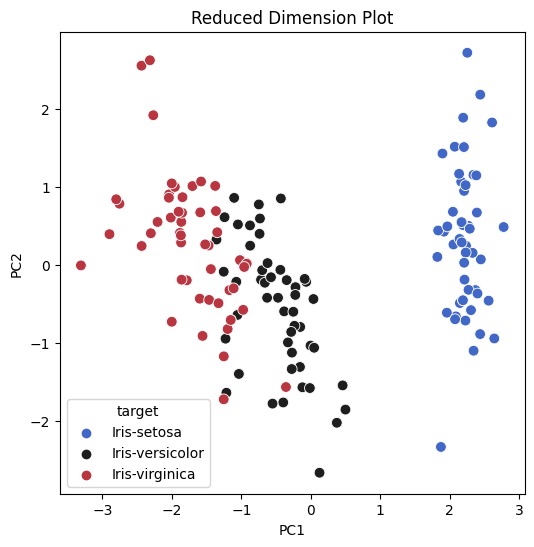

In [18]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
plt.title('Reduced Dimension Plot')
plt.show()